In [27]:
import pandas as pd
data = pd.read_csv("Transcripts_demo.csv")
data

,Unnamed: 0,Sales_ID,Transcript
0,0,SalesID1,"Good morning, sir. My name is Irish Emma and..."


Overall Sentiment Analysis for the entire pitch...

In [28]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity  # Lambda defination of function pol to get polarity...
sub = lambda x: TextBlob(x).sentiment.subjectivity  # Lambda defination of function sub to get subjectivity...

data["polarity"] = data["Transcript"].apply(pol)
data["subjectivity"] = data["Transcript"].apply(sub)
data

,Unnamed: 0,Sales_ID,Transcript,polarity,subjectivity
0,0,SalesID1,"Good morning, sir. My name is Irish Emma and...",0.18191,0.407227


Text(0, 0.5, '<-- Facts -------- Opinions -->')

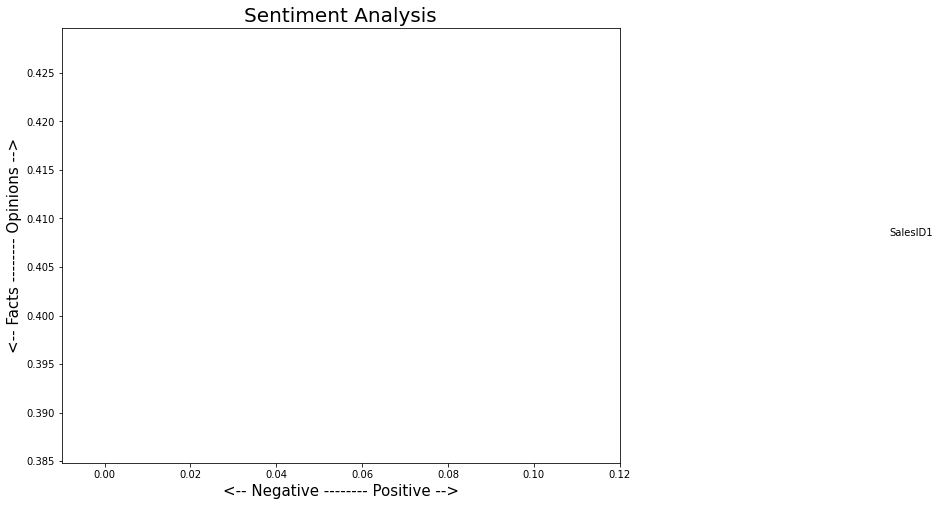

In [29]:
# Plot of polarity & subjectivity of Sales_IDs for ease of comparision...

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 8]

for index, Sales_ID in enumerate(data.index):   # Need to Understand this piece of code...
    x = data.polarity.loc[Sales_ID]
    y = data.subjectivity.loc[Sales_ID]
    plt.scatter(x, y, color="blue")
    plt.text(x+.001, y+.001, data.Sales_ID[index], fontsize=10)
    plt.xlim(-.01, .12)

plt.title("Sentiment Analysis", fontsize=20)
plt.xlabel("<-- Negative -------- Positive -->", fontsize=15)
plt.ylabel("<-- Facts -------- Opinions -->", fontsize=15)

# plt.show()

Sentiment Analysis over certain (n) chunks of duration of the pitch...

In [30]:
import numpy as np
import math

def split_text(text, n=25):
    
    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text...

    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list...

    split_list = []
    
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    
    return split_list

In [31]:
# Dividing the entire pitch into equally sized chuncks (n=10)...

list_pieces = []

for t in data.Transcript:
    split = split_text(t)
    list_pieces.append(split)

# list_pieces

In [32]:
len(list_pieces)

1

In [33]:
len(list_pieces[0])

25

In [34]:
# Calculate the polarity for each chunk of text from the list of chunks created...

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.038095238095238085,
  0.1987012987012987,
  0.21948051948051953,
  0.12499999999999999,
  0.37023809523809526,
  0.5925925925925927,
  0.11607744107744107,
  -0.23015873015873017,
  0.07222222222222222,
  0.3125,
  0.15166666666666667,
  0.2571428571428571,
  0.375,
  0.14576190476190476,
  0.2773809523809524,
  0.15138888888888888,
  0.1892857142857143,
  -0.02142857142857143,
  0.05519480519480519,
  0.1787878787878788,
  0.2469230769230769,
  0.25416666666666665,
  -0.0125,
  0.26071428571428573,
  0.312]]

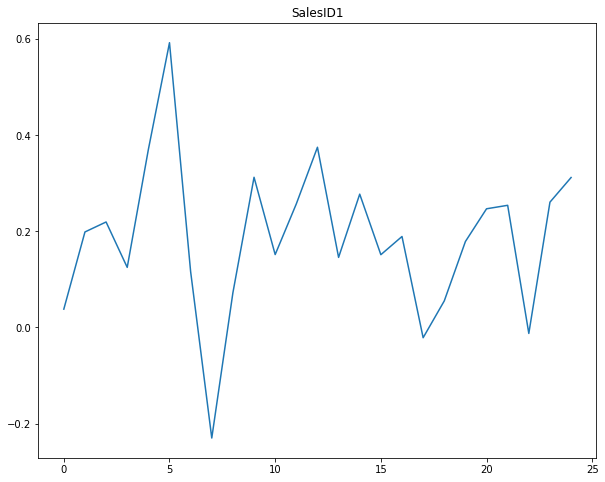

In [35]:
# Show the plot for one Sales_ID...

plt.plot(polarity_transcript[0])
plt.title(data["Sales_ID"][0])
plt.show()

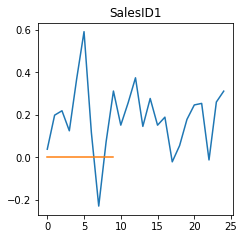

In [36]:
# Show the plot for all Sales_IDs... for comaprission...

plt.rcParams["figure.figsize"] = [16, 12]

for index, Sales_ID in enumerate(data.index):
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0, 10), np.zeros(10))
    plt.title(data["Sales_ID"][index])
    # plt.ylim(ymin=-.2, ymax=.3)
plt.show()

FURTHER WORK...
1. Named Entity Recognition
2. Verb, Noun classification & relations

In [37]:
import nltk as n
import nltk.tokenize as nt

In [38]:
# Creating a list containing a list of tokens per SalesID Transcript...
# Will use this list of sentence wise tokens for Entity Recognition & Noun Verb analysis...
list_tokens = []
for i in range(len(data)):
    tokens = nt.sent_tokenize(data.Transcript[i])
    list_tokens.append(tokens)

In [39]:
# Sentiment analysis per sentence... for 1 Sales ID...
Senti_list = []
for i in list_tokens:
    temp_sent = []
    for t in i:
        temp_sent.append(TextBlob(t).sentiment.polarity)
    Senti_list.append(temp_sent)
Senti_list

[[0.7,
  0.0,
  0.0,
  0.0,
  -0.2357142857142857,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.2671428571428572,
  0.0,
  -0.275,
  0.4,
  -0.2,
  0.0,
  0.8,
  0.0,
  0.13636363636363635,
  0.0,
  0.65,
  0.5,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.4,
  0.0,
  0.325,
  0.0,
  0.0,
  0.25,
  -0.4,
  0.0,
  0.0,
  0.4,
  0.35714285714285715,
  0.0,
  1.0,
  0.0,
  0.25,
  0.0,
  0.0,
  0.21428571428571427,
  0.0,
  0.6777777777777777,
  1.0,
  0.35,
  0.1,
  0.0,
  1.0,
  0.0,
  0.5,
  -0.125,
  0.41666666666666663,
  -0.2,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.10727272727272727,
  0.0,
  0.0,
  -0.05714285714285714,
  0.0,
  0.0,
  0.25,
  -0.8,
  -0.4,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.033333333333333326,
  0.3333333333333333,
  0.0,
  0.0,
  0.25,
  0.0,
  0.0,
  0.5,
  0.5,
  0.0,
  0.0,
  0.25,
  0.0,
  0.0,
  0.0,
  0.25,
  0.125,
  0.22,
  -0.1,
  0.0,
  0.2285714285714286,
  0.4,
  0.0,
  0.1,
  0.6,
  0.0,
  0.0,
  0.375,
  0.33333333

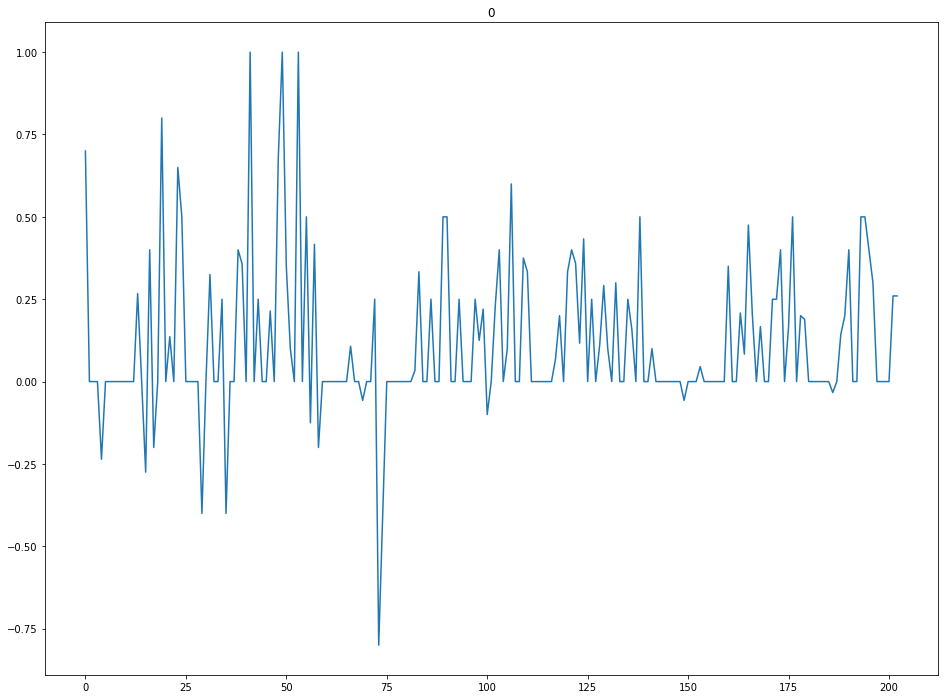

In [40]:
# Plotting the sentiment per sentence for each 1 Sales ID... (Future scope plotting multiple plots per Sales ID...)
# Future work: Can be used to count number of times the Sales person portrayed negative emotions over the course of the Sales pitch...

plt.plot(Senti_list[0])
plt.title(data["Sales_ID"].index[0])
plt.show()

In [41]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")  # Named Entity Recognition...

c:\Python310\lib\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [42]:
# Extracting entities from the Transcript using NER function...(Named Entity Recognition)
temp = data.Transcript[0]
text1 = NER(temp)
text1

displacy.render(text1,style="ent",jupyter=True)

In [43]:
#Extracting ORG list keywords from the transcript of 1 Sales ID...

org_list = []
for word in text1.ents:
    # print(word.text,word.label_)
    if (word.label_ == "ORG"):
        org_list.append(word)
org_list

# Future work: Might be useful for keyword mapping after the transcript is boosted with the list of keywords...
# Creating wordclouds using this list of words...

[DCM Shriram,
 Edge,
 Green Building Council,
 DCM Shriram,
 Turner,
 PVC,
 PVC,
 Nationwide Network,
 G,
 FX,
 Hardware,
 Ultra Luxury,
 Slimline,
 Ultra Luxury,
 Slimline,
 Ultra Luxury,
 Slimline,
 Often High Energy Efficiency,
 Vision,
 Channel,
 Lords,
 USB,
 CMS,
 Reba,
 USB,
 EMS,
 PVC,
 Apple Store]

In [44]:
# Scrap word cloud... not required...

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(collocations=False, background_color="white")

In [45]:
# Plotting wordclouds per sales ID
# Hard coded at the moment... change this to accomodate multiple sales IDs as per user requirement...
# Wordcloud plotted for Org List created for 1 sales ID...

# wc.generate(org_list)

# plt.subplot(1, 1, 1)
# plt.imshow(wc, interpolation="bilinear")
# plt.axis("off")
# plt.title("Wordcloud SalesID1")
# plt.show()

# Note: Wordcloud might not be required... match these with keywords... count number of keywords matched per Sales ID and grade from there??

In [46]:
import nltk as n
import nltk.tokenize as nt
import re
import string

In [47]:
def clean_text_round1(text):
    text = text.lower()     #changing all to lower case...
    text = re.sub("[%s]" %re.escape(string.punctuation),"",text)    # removing punctuations...
    text = re.sub("\w*\d\w*","",text)   #removing numbers & surround characters...
    text = re.sub("\n","",text)
    return text
round1 = lambda x: clean_text_round1(x) # defining a lambda function to make referencing the clean_text_round1() function ez...

In [48]:
clean_text = clean_text_round1(temp)
# clean_text

In [49]:
text2 = NER(clean_text)
displacy.render(text2, style = "ent", jupyter = True)

In [50]:
# clean_text -> dataset with the cleaned transcript...
# used to match with the keywords list...

keyword_list_uPVC = {"intro":["my name", "fenesta", "dcm shriram", "fenesta edge", "fenesta aluminium"],
"about fenesta":["superbrand", "green building council", "energy saver", "uwdma member", "indias largest", "327 cities"],
"DCM business portfolios":["agri rural business", "chloro vinyl business", "fenesta"],
"Agri Rural":["urea", "sugar", "farm solutions", "hybrid seeds", "hariyali kisaan bazaar"],
"Chloro vinyl":["alkali", "calcium carbide", "pvc", "cement"],
"Fenesta features":["sound insultaion", "rain", "storm", "non toxic", "lead free", "dust free", "low maintenance", "energy efficient"],
"Fenesta Edge":["360 degree", "powder coating"],
"Design features":["minimalistic", "versatile", "durability", "durable", "low maintenance"],
"Product range":["ultra luxury", "super luxury", "luxury"],
"Ultra luxury":["slimline slider", "lift and slide", "slide and fold"],
"Super luxury":["slider door", "slider window", "casement door", "casement window"],
"Luxury":["luxury slider", "casement door", "casement window"],
"UL_Slimline slider door":["thermal break", "insulation", "concealed"],
"UL_Lift slide door":["insulation", "resistance", "child safety"],
"UL_Slide and fold":["insulation", "glass"],
"SL_Slider door":["slimmest", "stainless steel", "rollers", "glass", "gasket"],
"SL_Slider window":["gasket"],
"SL_Casement door":["triple sealing", "threshold"],
"SL_Casement window":["insulation", "triple sealing", "multipoint locking", "glass", "drip bar"],
"L_Luxury series":["slim interlock", "rollers", "glazed glass"],
"Fenesta Colours":["diamond grey", "champagne gold", "pristine white", "light oak", "walnut"]}

In [57]:
# Total number of Keywords being checked...

count = 0
for temp in keyword_list_uPVC:
    print(temp, "::")
    keyword_covering = temp
    for j in keyword_list_uPVC[temp]:
        print(j)
        keys_covered = []
        count = count + 1

intro ::
my name
fenesta
dcm shriram
fenesta edge
fenesta aluminium
about fenesta ::
superbrand
green building council
energy saver
uwdma member
indias largest
327 cities
DCM business portfolios ::
agri rural business
chloro vinyl business
fenesta
Agri Rural ::
urea
sugar
farm solutions
hybrid seeds
hariyali kisaan bazaar
Chloro vinyl ::
alkali
calcium carbide
pvc
cement
Fenesta features ::
sound insultaion
rain
storm
non toxic
lead free
dust free
low maintenance
energy efficient
Fenesta Edge ::
360 degree
powder coating
Design features ::
minimalistic
versatile
durability
durable
low maintenance
Product range ::
ultra luxury
super luxury
luxury
Ultra luxury ::
slimline slider
lift and slide
slide and fold
Super luxury ::
slider door
slider window
casement door
casement window
Luxury ::
luxury slider
casement door
casement window
UL_Slimline slider door ::
thermal break
insulation
concealed
UL_Lift slide door ::
insulation
resistance
child safety
UL_Slide and fold ::
insulation
glass
S

In [58]:
count

80

In [59]:
remarks = []

In [60]:
# This can be made into a function???

waste = 0
intext = 0
for temp in keyword_list_uPVC:
    match = []
    missing = []
    # remarks = []
    for i in keyword_list_uPVC[temp]:
        if i in clean_text:
            match.append(i)
            intext = intext + 1
        else:
            missing.append(i)
    if len(missing) == 0:
        waste = waste+1
    else:
        remarks.append("From section " + temp +" the pointers of {} were missing".format(missing))

remarks

["From section about fenesta the pointers of ['uwdma member', '327 cities'] were missing",
 "From section DCM business portfolios the pointers of ['agri rural business', 'chloro vinyl business'] were missing",
 "From section Agri Rural the pointers of ['farm solutions', 'hariyali kisaan bazaar'] were missing",
 "From section Fenesta features the pointers of ['sound insultaion', 'storm', 'non toxic', 'lead free'] were missing",
 "From section Fenesta Edge the pointers of ['360 degree'] were missing",
 "From section Design features the pointers of ['durable'] were missing",
 "From section Ultra luxury the pointers of ['slide and fold'] were missing",
 "From section Super luxury the pointers of ['slider door'] were missing",
 "From section Luxury the pointers of ['luxury slider'] were missing",
 "From section SL_Slider door the pointers of ['slimmest'] were missing",
 "From section L_Luxury series the pointers of ['glazed glass'] were missing",
 "From section Fenesta Colours the pointers 

In [61]:
intext

62

In [67]:
percentage_coverage = (intext/count)*10
percentage_coverage

7.75

In [68]:
data["Contextual Coverage"] = round(percentage_coverage,0)
data

,Unnamed: 0,Sales_ID,Transcript,polarity,subjectivity,Contextual Coverage
0,0,SalesID1,"Good morning, sir. My name is Irish Emma and...",0.18191,0.407227,8.0
